In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, FloatSlider, Dropdown, Checkbox
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 25: Kontinuierliche Zufallsvariablen II

Gegeben sei die Verbundverteilungsdichtefunktion zweier Zufallsvariablen $X$ und $Y$:

\begin{align*}
    p_{X,Y}(x, y) =
    \begin{cases}
        ax^3y, & 0 \leq x \leq 1 \wedge 0 \leq y \leq 3, \\
        0, &\text{sonst},
    \end{cases}
\end{align*}

mit der Normierungskonstanten $a$. Die Verbundverteilungsdichtefunktion weist somit nur in dem in der unten stehenden Abbildung skizzierten Bereich **$II$** Werte größer Null auf.

![Wertebereich](figures/A25/wertebereich.png)

### Graph der Verbundverteilungsdichtefunktion $p_{X,Y}(x,y)$:

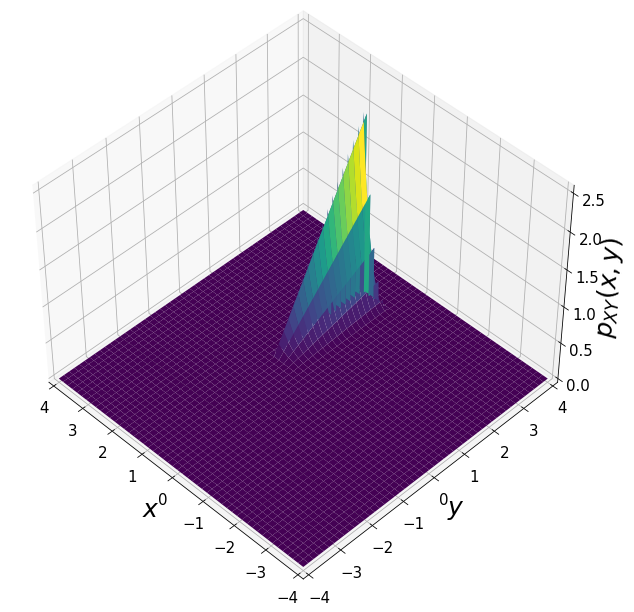

In [2]:
x1d = np.linspace(-4, 4, 500)
y1d = np.linspace(-4, 4, 500)
x, y = np.meshgrid(x1d, y1d)

def p_XY(x,y):
    return 8/9*x**3*y*(np.abs(x-0.5) <= 0.5)*(np.abs(y-1.5) <= 1.5)

fig = plt.figure(figsize=(15, 15/np.sqrt(2)))
ax = plt.subplot(projection='3d')
surf1 = ax.plot_surface(x, y, p_XY(x,y), cmap='viridis')

# Achsbeschriftungen
ax.grid(True)

ax.set_xlim((-4, 4))
ax.invert_xaxis()
ax.set_xlabel(r'$x$', fontsize=25)

ax.set_ylim((-4, 4))
ax.invert_yaxis()
ax.set_ylabel(r'$y$', fontsize=25)

ax.set_zlabel(r'$p_{XY}(x,y)$', fontsize=25)
ax.view_init(45, -45)

## 25.1

Berechnen Sie die Verbundverteilungsfunktion $P_{X,Y}(x,y)=\Pr(X \leq x, Y \leq y)$ innerhalb der Bereiche **$I$**, **$II$** und **$III$** und bestimmen Sie den Wert der Konstanten $a$.

Die Verteilungsfunktion berechnet die (kumulative) Wahrscheinlichkeit, dass die Realisierung von $(X,Y)$ einen Wert kleiner gleich $(x,y)$ annimmt:

\begin{align*}
    P_{X,Y}(x,y) = \int_{-\infty}^y\int_{-\infty}^x p_{X,Y}(u,v) \mathrm du \mathrm dv
\end{align*}

Damit bezieht sich die Fallunterscheidung nach den Bereichen auf den möglichen Wertebereich von $x$ und $y$, der untersucht werden muss.

**$I$**: Zur Berechnung der Verbundverteilung teilen wir den Integrationsbereich in zwei nicht-überlappende rechteckige Bereiche ein:

\begin{align*}
    P_{X,Y}^{(I)}(x,y) &= \Pr(X\leq{}x\leq{}0,Y\leq{}y<\infty)+\Pr(0\leq{}X\leq{}x<\infty,Y\leq{}y\leq{}0) \\
    &= \int_{-\infty}^\infty\int_{-\infty}^x\underbrace{p_{X,Y}(u,v)}_{=0, \ \text{da x < 0}\ \forall{}x}\mathrm du \mathrm dv
    + \int_{-\infty}^y\int_0^x\underbrace{p_{X,Y}(u,v)}_{=0, \ \text{da y < 0}\ \forall{}y}\mathrm du \mathrm dv \\
    &= 0
\end{align*}

**$II$**: Der zu integrierende Bereich läuft von $(-\infty, -\infty)$ bis $(x, y), x\in[0,1], y\in[0,3]$. Analog zu **$I$** teilen wir diesen Bereich wieder in rechteckige Bereiche ein, diesmal in drei Bereiche und unter Berücksichtigung der Grenzen von Bereich **$II$**:

\begin{align*}
    P_{X,Y}^{(II)}(x,y) &= \Pr(0\leq{}X\leq{}x\leq1,0\leq{}Y\leq{}y\leq3) + \underbrace{\Pr(X\leq{}x\leq1,Y\leq{}y\leq0)}_{=0, \ \text{da y < 0}} + \underbrace{\Pr(X\leq{}x\leq0,Y\leq{}y\leq3)}_{=0, \ \text{da x < 0}} \\
\end{align*}
\begin{align*}
    P_{X,Y}^{(II)}(x,y) &= \int_{0}^{x}\int_{0}^{y} au^3 v \mathrm d v \mathrm d u \\
    &= a \int_{0}^{x}
    u^3 \left.\left(\frac{1}{2} v^2\right)\right|_{0}^{y}
    \mathrm d u \\
    &= \frac{1}{2} a y^2 \left.\left(\frac{1}{4}u^4\right)\right|_{0}^{x} = \frac{1}{8} a x^4 y^2
\end{align*}

**$III$**: Der zu integrierende Bereich läuft von $(-\infty, -\infty)$ bis $(x, y), x\in[1,\infty[,y\in[3,\infty[$. Dieser Bereich lässt sich in vier rechteckige Bereiche einteilen:

\begin{align*}
    P_{X,Y}^{(III)}(x,y) &= \Pr(X\leq1,Y\leq3) + \underbrace{\Pr(1\leq{}X\leq{}x<\infty,Y\leq3)}_{=0,\ \text{da x > 1}} + \underbrace{\Pr(X\leq1,3\leq{}Y\leq{}y\leq\infty)}_{=0,\ \text{da y > 3}} + \underbrace{\Pr(1\leq{}X\leq{}x\leq\infty,3\leq{}Y\leq{}y\leq\infty)}_{=0}
\end{align*}

Der einzige Summand, der übrig bleibt, entspricht genau dem Wert der Verbundverteilungsfunktion aus Bereich **$II$** für $x=1$ und $y=3$:
\begin{align*}
    P_{X,Y}^{(III)}(x,y) = \frac{1}{8} a\cdot{}1^4\cdot{}3^2 = \frac{9}{8}a
\end{align*}

Für die (Verbund-)Verteilungsfunktion gilt: $P_{X,Y}(\infty, \infty)=1$. Der Punkt $(x=\infty,y=\infty)$ fällt in Bereich **$III$** mit der Verbundverteilungsfunktion $P_{X,Y}^{(III)}(x, y)=\frac{9}{8}a$. Gleichsetzen liefert $a=\frac{8}{9}$.

### Visualisierung der Integrationsbereiche zur Berechnung der Verbundverteilungsfunktion

In [3]:
xmin, xmax, ymin, ymax = -3, 4, -3, 5

def plot_grid(ax):
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(r'$x$', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel(r'$y$', size=14, labelpad=-21, y=1.02, rotation=0)
    x_ticks = np.arange(xmin, xmax+1, 1)
    y_ticks = np.arange(ymin, ymax+1, 1)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

def draw_areas(ax):
    area_1 = [
    patches.Rectangle((xmin, ymin), 0-xmin, ymax-ymin, linewidth=1, edgecolor='none', facecolor='#B3B3B3'),
    patches.Rectangle((xmin, ymin), xmax-xmin, 0-ymin, linewidth=1, edgecolor='none', facecolor='#B3B3B3')
    ]
    area_2 = patches.Rectangle((0, 0), 1, 3, linewidth=1, edgecolor='none', facecolor='#666666')
    area_3 = patches.Rectangle((1, 3), xmax-1, ymax-3, linewidth=1, edgecolor='none', facecolor='#B3B3B3')
    for area_1_ in area_1:
        ax.add_patch(area_1_)
    ax.text(xmin+0.1, ymin+0.1, r'I', fontsize=24)
    ax.add_patch(area_2)
    ax.text(0.4, 1.5, r'II', fontsize=24)
    ax.add_patch(area_3)
    ax.text(2.4, 4.5, r'III', fontsize=24)

area_selection = Dropdown(options = ['I','II','III'], value='I')
x_slider = FloatSlider(step=0.05)
y_slider = FloatSlider(step=0.05)

def update_slider(*args):
    if area_selection.value == 'I':
        y_slider.min = -3
        y_slider.max = ymax
        x_slider.min = xmin
        x_slider.max = xmax
    elif area_selection.value == 'II':
        y_slider.min = 0
        y_slider.max = 3
        x_slider.min = 0
        x_slider.max = 1
    else:
        y_slider.min = 3
        y_slider.max = ymax
        x_slider.min = 1
        x_slider.max = xmax

y_slider.observe(update_slider)
x_slider.observe(update_slider)

@interact(
    area=area_selection, x=x_slider, y=y_slider,
    show_integral_area=Checkbox(False, description='Integrationsbereich anzeigen'),
)
def visualize_cdf(area, x, y, show_integral_area):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    plot_grid(ax)
    draw_areas(ax)
    if area == 'I' and y > 0:
        x = min(x, 0)
    if area == 'I':
        area_1_a = patches.Rectangle(
            (xmin, ymin), 0-xmin, ymax-ymin, linewidth=1, facecolor='#664466', alpha=1
        )
        area_1_b = patches.Rectangle((0, ymin), xmax, 0-ymin, linewidth=1, facecolor='#446644', alpha=1,)
        ax.add_patch(area_1_a)
        ax.add_patch(area_1_b)
        ax.text(x+0.1, y+0.1, r'$P_{X,Y}(x,y)=0$', c='r')
    elif area == 'II':
        area_2_a = patches.Rectangle(
            (0, 0), 1, 3, linewidth=1, facecolor='#664466',
        )
        area_2_b = patches.Rectangle(
            (xmin, ymin), 1-xmin, 0-ymin, linewidth=1, facecolor='#446644',
        )
        area_2_c = patches.Rectangle(
            (xmin, ymin), 0-xmin, 3-ymin, linewidth=1, facecolor='#446644',
        )
        ax.add_patch(area_2_a)
        ax.add_patch(area_2_b)
        ax.add_patch(area_2_c)
        ax.text(x+0.1, y+0.1, r'$P_{X,Y}(x,y)=$'+f'{1/9*x**4*y**2:.2f}', c='r')
    else:
        area_3_a = patches.Rectangle((1, 3), xmax-1, ymax-3, linewidth=1, facecolor='#664466')
        area_3_b = patches.Rectangle((xmin, ymin), 1-xmin, 3-ymin, linewidth=1, facecolor='#446644')
        area_3_c = patches.Rectangle((xmin, 3), 1-xmin, ymax-3, linewidth=1, facecolor='#444466')
        area_3_d = patches.Rectangle((1, ymin), xmax-1, 3-ymin, linewidth=1, facecolor='#444466')
        ax.add_patch(area_3_a)
        ax.add_patch(area_3_b)
        ax.add_patch(area_3_c)
        ax.add_patch(area_3_d)
        ax.text(x+0.1, y+0.1, r'$P_{X,Y}(x,y)=1$', c='r')
    if show_integral_area:
        integral_area = patches.Rectangle((xmin, ymin), x-xmin, y-ymin, linewidth=1, facecolor='r', alpha=0.3)
        ax.add_patch(integral_area)
    ax.scatter(x, y, s=40, c='r')

interactive(children=(Dropdown(description='area', options=('I', 'II', 'III'), value='I'), FloatSlider(value=0…

## 25.2

Berechnen Sie die Randverteilungsdichtefunktionen $p_X(x)$ und $p_Y(y)$. Sind die Zufallsvariablen X und Y statistisch unabhängig (Begründung)?

\begin{align*}
    p_X(x)
    &=
    \int_{-\infty}^{\infty}
    p_{X,Y}(x,y)
    \mathrm d y
    =
    \begin{cases}
        \int_{0}^{3} \frac{8}{9} x^3 y \mathrm d y, & 0 \leq x \leq 1, \\
        0, &\text{sonst}.
    \end{cases}
    =
    \begin{cases}
    4 x^3, & 0 \leq x \leq 1, \\
    0, &\text{sonst}.
    \end{cases}
\end{align*}

Entsprechend ergibt sich für die Randverteilung von $Y$ folgender Ausdruck:

\begin{align*}
    p_Y(y)
    &=
    \begin{cases}
    \frac{2}{9} y, & 0 \leq y \leq 3, \\
    0, &\text{sonst}.
    \end{cases}
\end{align*}

Die Zufallsvariablen sind statistisch unabhängig, da sich die Verbundverteilung in die beiden Randverteilungen faktorisieren lässt:
\begin{align*}
    p_{X,Y}(x,y) = \frac{8}{9} x^3 y
    = 4 x^3 \cdot \frac{2}{9} y = p_X(x) \, p_Y(y)
    \text{ für } 0 \leq x \leq 1 \wedge 0 \leq y \leq 3.
\end{align*}

### Graph von $p_X(x)$

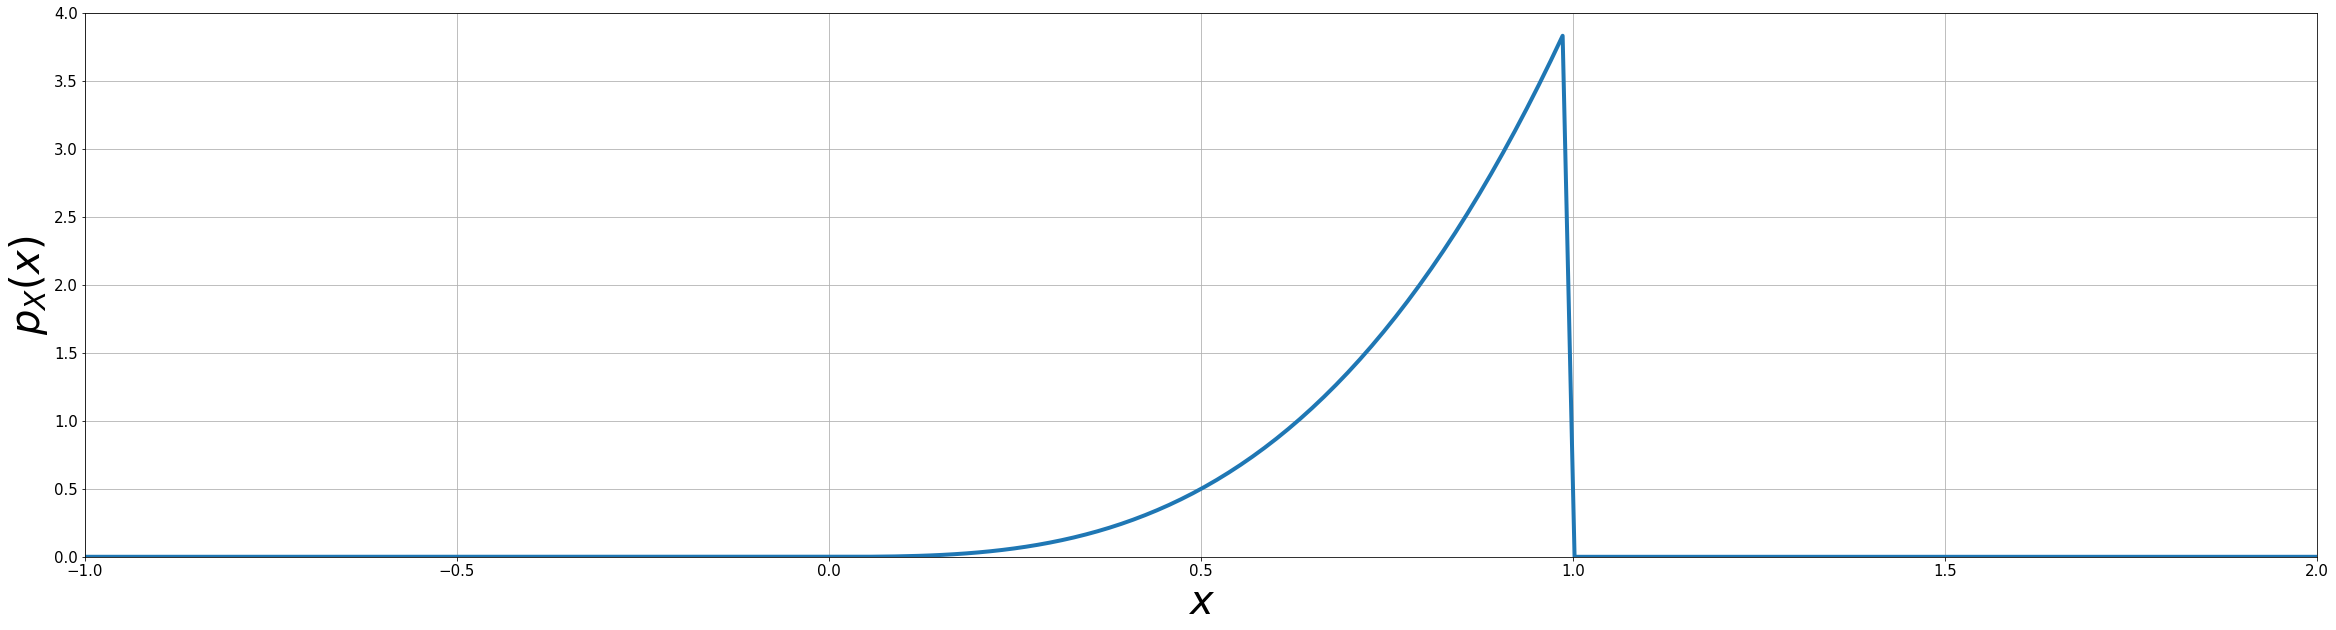

In [4]:
p_x = 4*x1d**3*(np.abs(x1d-0.5)<=0.5)
plt.plot(x1d, p_x, lw=4)
plt.xlim((-1, 2))
plt.ylim((0, 4))
plt.xlabel(r'$x$', fontsize=40)
plt.ylabel(r'$p_X(x)$', fontsize=40)
plt.grid(True)

### Graph von $p_Y(y)$

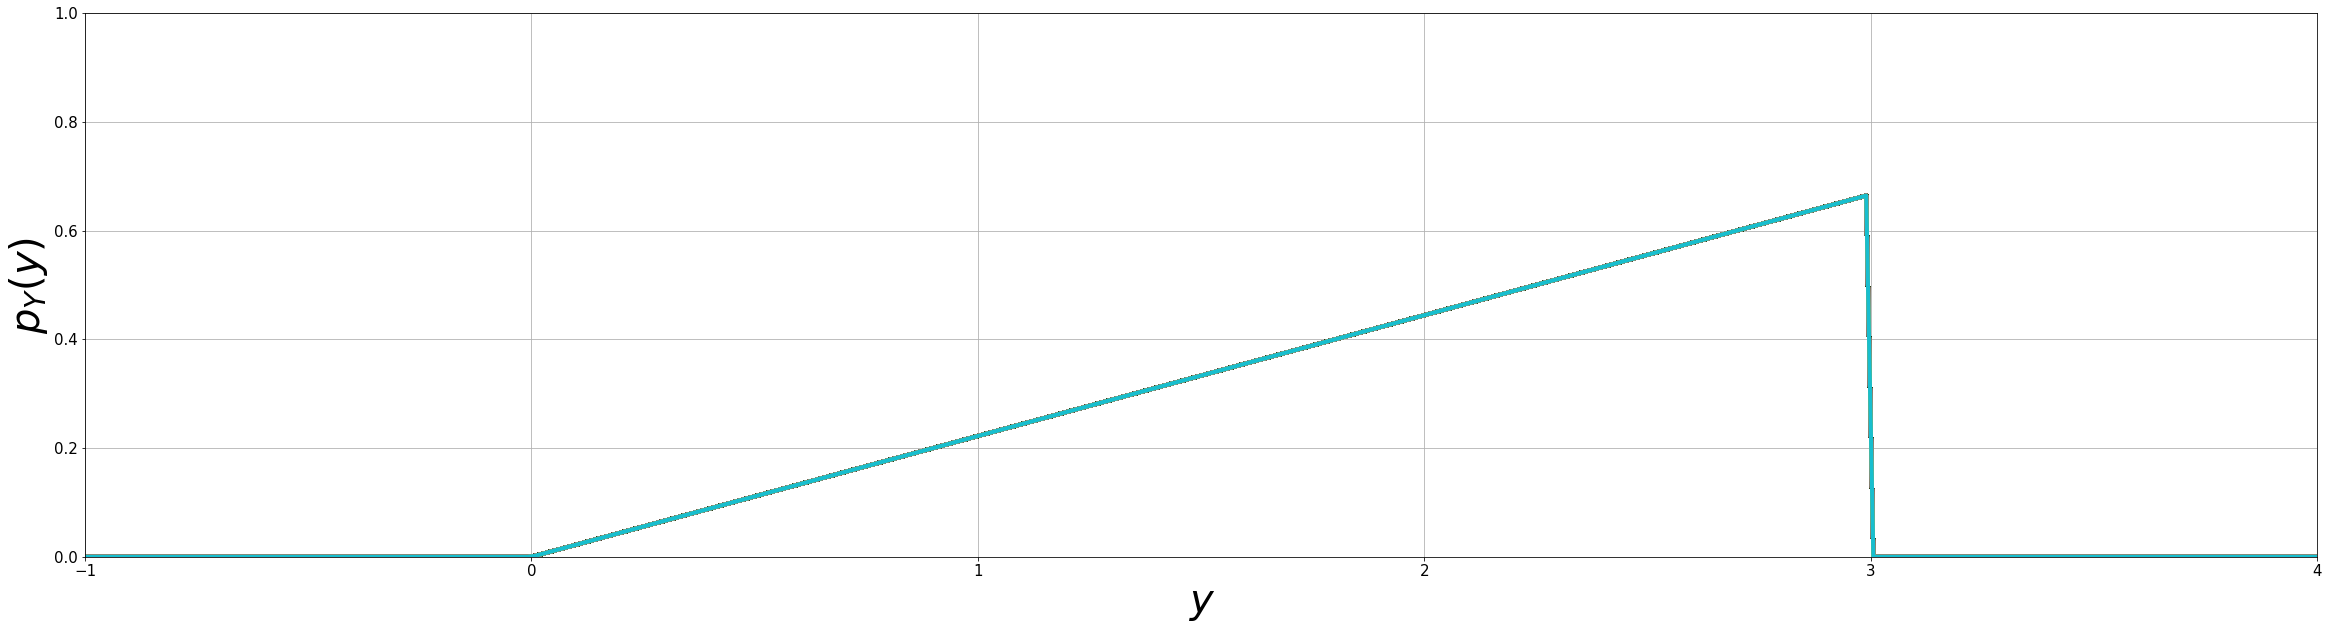

In [5]:
p_y = 2/9*y*(np.abs(y-1.5)<=1.5)
plt.plot(y1d, p_y, lw=4)
plt.xlim((-1, 4))
plt.ylim((0, 1))
plt.xlabel(r'$y$', fontsize=40)
plt.ylabel(r'$p_Y(y)$', fontsize=40)
plt.grid(True)

## 25.3

Berechnen Sie den Mittelwert, Leistung und die Varianz der Zufallsvariablen $X$.

\begin{align*}
    \mathrm{E}[ X ]
    &=
    \int_{-\infty}^{\infty}
    x p_X(x) \mathrm d x
    =
    4 \int_{-\infty}^{\infty}
    x \cdot x^3 \mathrm d x
    = \frac{4}{5} = \mu_X, \\
    %
    \mathrm{E}[ X^2 ]
    &=
    \int_{-\infty}^{\infty}
    x^2 p_X(x) \mathrm d x
    =
    4 \int_{-\infty}^{\infty}
    x^2 \cdot x^3 \mathrm d x
    = \frac{4}{6}\\
    %
    \mathrm{E}[ (X - \mu_X)^2 ]
    &=
    \frac{4}{6} - \left(\frac{4}{5}\right)^2
    = \sigma_X^2.
\end{align*}

Im Folgenden wird die Zufallsvariable $Z$ über die Beziehung $Z=X+Y$ eingeführt. Die bedingte Verteilungsdichtefunktion $p_{Z|X}(z|x)$ ist somit durch $$p_{Z|X}(z|x)=p_Y(y=z-x).$$ gegeben.

## 25.4

Berechnen Sie die Verbundverteilungsdichtefunktion $p_{X,Z}(x,z)$.

Verwende die Regel der bedingten Wahrscheinlichkeit:

\begin{align*}
    p_{X,Z}(x,z) &= p_{Z|X}(z|x) \, p_X(x) = p_Y(z-x) \, p_X(x) \\
    &=
    \begin{cases}
        \frac{2}{9} (z-x) \cdot 4 x^3, &0 \leq x \leq 1 \wedge x \leq z \leq 3 +x, \\
        0, &\text{sonst}.
    \end{cases}
\end{align*}

## 25.5

Sind die Zufallsvariablen $X$ und $Z$ statistisch unabhängig (Begründung)?

Nein, sind Sie nicht, denn $x$ bestimmt den Wertebereich von $z$ für den $p_{Z|X}(z|x)\neq{}0$:

\begin{align*}
    0 \leq z-x \ \leq 3 \Leftrightarrow x \leq z \leq 3+x
\end{align*}

\begin{align*}
    p_{Z|X}(z|x) = p_Y(z-x) = \frac{2}{9}(z-x)\text{rect}\Big(\frac{z-(x+3/2)}{3}\Big)
\end{align*}

### Graph von $p_{Z|X}(z|x)$

In [6]:
def p_Z_given_X(z, x):
    return 2/9*(z-x)*(np.abs(z-(x+1.5)) <= 1.5)

@interact(x_given=FloatSlider(min=-2, max=2, step=0.25, value=0.))
def plot_p_Z_given_X(x_given):
    z = np.linspace(-6, 6, 10000)
    density = p_Z_given_X(z, x_given)
    plt.figure()
    plt.axvline(lw=0.75, c='k')
    plt.plot(z, density, lw=4)
    plt.axhline(lw=0.75, c='k')
    plt.xlim((-3, 6))
    plt.ylim((0, 1))
    plt.xlabel(r'$z$', fontsize=40)
    plt.ylabel(r'$p_{Z|X}(z|x)$', fontsize=40)
    plt.grid(True)

interactive(children=(FloatSlider(value=0.0, description='x_given', max=2.0, min=-2.0, step=0.25), Output()), …

## 25.6

Berechnen Sie symbolisch die Randverteilungsdichte $p_Z(z)$ (d.h. Lösen Sie das Integral nicht auf!).
Welche mathematische Operation verbirgt sich dahinter?

\begin{align*}
    p_Z(z) &= \int_{-\infty}^{\infty} p_{X,Z}(x,z) \mathrm{d} x \\
           &= \int_{-\infty}^\infty p_{Z|X}(z|x)p_X(x) \mathrm{d} x \\
           &= \int_{-\infty}^{\infty} p_Y(z-x) \, p_X(x) \mathrm{d} x \\
           &= p_Y(z) \ast p_X(z)
\end{align*}

Die Randverteilungsdichte $p_Z(z)$ lässt sich durch die Faltung der Verteilungen $p_X(x)$ und $p_Y(y)$ berechnen. Das funktioniert aber nur, wenn die ursprünglichen Variablen statistisch unabhängig sind.